Previewing batch:


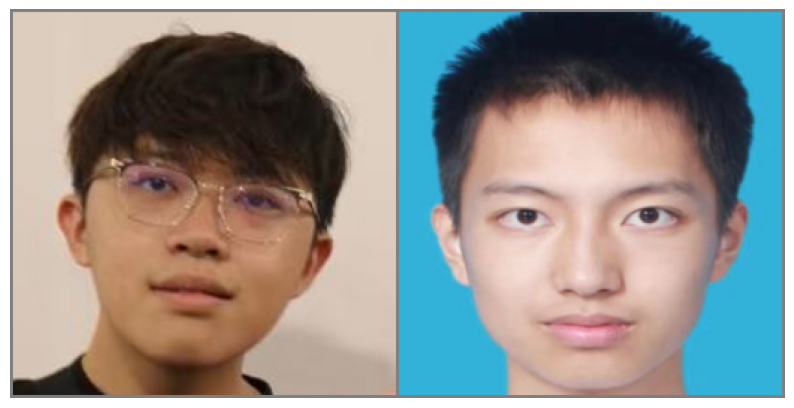

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import torch
import torchvision
import matplotlib.pyplot as plt

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        # Convert image to RGB mode explicitly
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return {"images": image}

# Parameters
image_size = 256
batch_size = 4

# Modified preprocessing transforms to handle RGB images
preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),  # Normalize for RGB channels
])

# Create dataset from your local images
dataset = CustomImageDataset(
    image_dir="private_images",  # Path to your image directory
    transform=preprocess
)

# Create dataloader
train_dataloader = torch.utils.data.DataLoader(
    dataset, 
    batch_size=batch_size, 
    shuffle=True
)

# Preview batch
print("Previewing batch:")
batch = next(iter(train_dataloader))
grid = torchvision.utils.make_grid(batch["images"], nrow=4)
plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5)
plt.axis('off')
plt.show()